#### Image Classification 
##### Task2 : Machine Learning
##### Student: Jun Wee Tan 101231636

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#function to load and serialize the CIFAR-10 dataset files
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [7]:
# dataset checking and preparation
batch_list = []

#import all 5 data batches of image
for i in range (1,6):  
    db = unpickle(f'data_batch_{i}')
    batch_list.append(db)

#checking
for index, batch  in enumerate(batch_list):
    print(f"Data Batch {index + 1} length: ", len(batch))
    print(f"Data Batch {index + 1} keys: ", batch.keys())
    #Michael - Changed this from data_batch to batch as that seemed more accurate
    print(f"Data Batch {index + 1} data file type:", batch[b'data'].dtype)
    print(f"Data Batch {index + 1} data file shape:", batch[b'data'].shape)
    print()
    
batch[b'data']

Data Batch 1 length:  4
Data Batch 1 keys:  dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Data Batch 1 data file type: uint8
Data Batch 1 data file shape: (10000, 3072)

Data Batch 2 length:  4
Data Batch 2 keys:  dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Data Batch 2 data file type: uint8
Data Batch 2 data file shape: (10000, 3072)

Data Batch 3 length:  4
Data Batch 3 keys:  dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Data Batch 3 data file type: uint8
Data Batch 3 data file shape: (10000, 3072)

Data Batch 4 length:  4
Data Batch 4 keys:  dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Data Batch 4 data file type: uint8
Data Batch 4 data file shape: (10000, 3072)

Data Batch 5 length:  4
Data Batch 5 keys:  dict_keys([b'batch_label', b'labels', b'data', b'filenames'])
Data Batch 5 data file type: uint8
Data Batch 5 data file shape: (10000, 3072)



array([[255, 252, 253, ..., 173, 231, 248],
       [127, 126, 127, ..., 102, 108, 112],
       [116,  64,  19, ...,   7,   6,   5],
       ...,
       [ 35,  40,  42, ...,  77,  66,  50],
       [189, 186, 185, ..., 169, 171, 171],
       [229, 236, 234, ..., 173, 162, 161]], dtype=uint8)

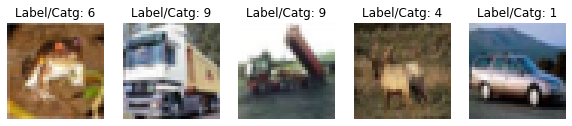

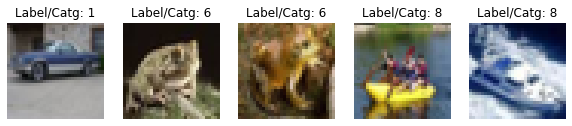

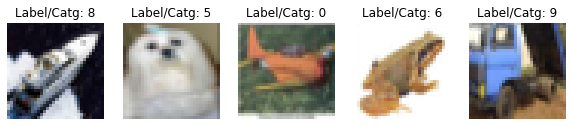

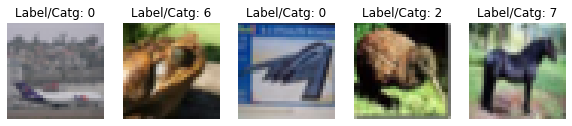

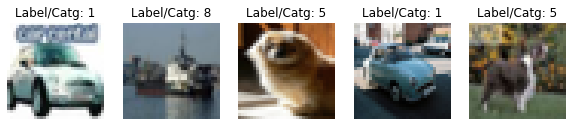

In [4]:
#display image 
def plot_images(images, labels, num_images):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2)) #create subplot with 1 row and 5 column
    for i, ax in enumerate(axes):
        ax.imshow(images[i])
        ax.set_title(f"Label/Catg: {labels[i]}")
        ax.axis('off') 
    plt.show()

for batch in batch_list:
    #reshape data from flatten array 10000x3072 to 10000x32x32x3 RGB images
    images_reshaped = batch[b'data'].reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1) #transpose into (10000x32x32x3) position
    labels = batch[b'labels']
    plot_images(images_reshaped, labels, num_images=5) #show 5 image

In [15]:
#### Image Classification - Model Trraining
##### Task2 : Machine Learning
##### Student: Michael Mooney 104266194
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler


x_train_batch_1, y_train_batch_1, x_val_batch_1, y_val_batch_1 = train_test_split(batch_list[0][b'data'], 
                                                                                  batch_list[0][b'labels'], 
                                                                                  test_size=0.30, 
                                                                                  random_state=25)
#x_train_batch_2, y_train_batch_2, x_val_batch_2, v_val_batch_2 = train_test_split(batch_list[1], batch_list[1][b'labels'])
#x_train_batch_3, y_train_batch_3, x_val_batch_3, v_val_batch_3 = train_test_split(batch_list[2], batch_list[2][b'labels'])
#x_train_batch_4, y_train_batch_4, x_val_batch_4, v_val_batch_4 = train_test_split(batch_list[3], batch_list[3][b'labels'])
#x_train_batch_5, y_train_batch_5, x_val_batch_5, v_val_batch_5 = train_test_split(batch_list[4], batch_list[4][b'labels'])

    

In [17]:
#### PIPELINE - SVM_CLF
from sklearn.svm import SVC
clfSVM = SVC(
    #C=2,
    #gamma=0.01,
    #kernel='linear'
)
print(batch_list[0][b'labels'])

scalarSVM = StandardScaler()

#May want to consider random state and shuffle
skfSVM = StratifiedKFold(n_splits=10)

pipelineSVM = Pipeline(
    [   
        ('scaler', scalarSVM),
        ('clf', clfSVM)
    ]
)

pipelineSVM.fit(x_train_batch_1, y_train_batch_1)
y_pred = pipelineSVM.predict(x_train_batch_1)
accuracy = accuracy_score(y_train_batch_1, y_pred)
print('Accuracy:' + str(accuracy))


[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 7, 1, 3, 0, 

ValueError: y should be a 1d array, got an array of shape (3000, 3072) instead.

In [ ]:
#### SVM_CLF GRID SEARCH
testSVM = True

if testSVM:
    params = {
    'clf__kernel':['linear', 'rbf'],
    'clf__gamma':[0.01, 0.10, 0.5, 1,2,3],
    'clf__C':[0.01, 0.1, 0.5, 1,2,3]
    }
    
    grid = GridSearchCV(
        pipelineSVM, 
        params, 
        cv = skfSVM, 
        refit = True, 
        verbose = 3, 
        n_jobs=-1, 
        error_score='raise'
    )
    grid.fit(
        x_train_batch_1, 
        y_train_batch_1
            )
     
    gridPred = grid.predict(x_val_batch_1) 

    print(clfSVM.get_params().keys())
    print(grid.best_params_)
    print(grid.best_estimator_)
    print(classification_report(y_val_batch_1, gridPred)) 

In [ ]:
#### PIPELINE - RFC_CLF
from sklearn.ensemble import RandomForestClassifier

clf_RFC = RandomForestClassifier(random_state=37)


In [ ]:
### GRID SEARCH